# Importing Libraries


In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Processed Data

In [ ]:
db= pd.read_csv('processed_data.csv')
X_all = db.drop('CLASS', axis=1)
y_all = db['CLASS']

# SVM Preprocessing & Setup (All Features)

In [11]:
# --- Feature Scaling (critical for SVM) ---
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all_scaled, y_all, test_size=0.2, random_state=42, stratify=y_all
)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}



# SVM Training, Tuning, and Evaluation (All Features)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
---- SVM (All Features) ----
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

         Non       0.87      0.95      0.91        21
     Predict       0.89      0.80      0.84        10
    Diabetic       0.99      0.98      0.99       169

    accuracy                           0.97       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.97      0.97      0.97       200



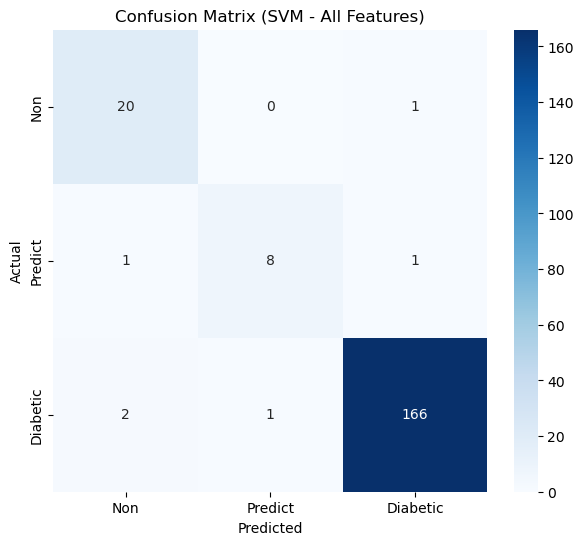

In [12]:
grid_svm_all = GridSearchCV(SVC(), param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
grid_svm_all.fit(X_train_all, y_train_all)

# --- Best Model Evaluation ---
best_svm_all = grid_svm_all.best_estimator_
y_pred_all = best_svm_all.predict(X_test_all)

print("---- SVM (All Features) ----")
print("Best Parameters:", grid_svm_all.best_params_)
print("Test Accuracy:", best_svm_all.score(X_test_all, y_test_all))
print("\nClassification Report:")
print(classification_report(y_test_all, y_pred_all, target_names=['Non', 'Predict', 'Diabetic']))

# --- Confusion Matrix ---
cm_all = confusion_matrix(y_test_all, y_pred_all)
plt.figure(figsize=(7,6))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non', 'Predict', 'Diabetic'],
            yticklabels=['Non', 'Predict', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM - All Features)")
plt.show()

# SVM Preprocessing & Setup (Strong Features)

In [14]:
strong_features = ['AGE', 'BMI', 'HbA1c', 'CLASS']
data_strong = db[strong_features]
X_strong = data_strong.drop('CLASS', axis=1)
y_strong = data_strong['CLASS']

scaler_strong = StandardScaler()
X_strong_scaled = scaler_strong.fit_transform(X_strong)

X_train_strong, X_test_strong, y_train_strong, y_test_strong = train_test_split(
    X_strong_scaled, y_strong, test_size=0.2, random_state=42, stratify=y_strong
)


# SVM Training, Tuning, and Evaluation (Strong Features)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
---- SVM (Strong Features) ----
Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.965

Classification Report:
              precision    recall  f1-score   support

         Non       0.90      0.86      0.88        21
     Predict       0.89      0.80      0.84        10
    Diabetic       0.98      0.99      0.98       169

    accuracy                           0.96       200
   macro avg       0.92      0.88      0.90       200
weighted avg       0.96      0.96      0.96       200



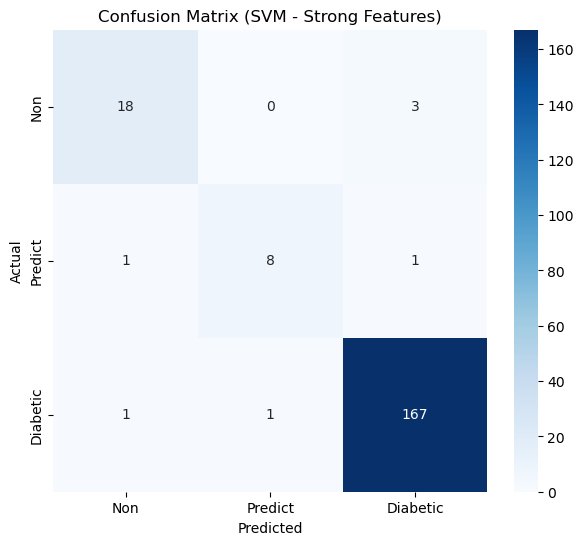

In [13]:
# --- GridSearchCV ---
grid_svm_strong = GridSearchCV(SVC(), param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=1)
grid_svm_strong.fit(X_train_strong, y_train_strong)

# --- Evaluation ---
best_svm_strong = grid_svm_strong.best_estimator_
y_pred_strong = best_svm_strong.predict(X_test_strong)

print("---- SVM (Strong Features) ----")
print("Best Parameters:", grid_svm_strong.best_params_)
print("Test Accuracy:", best_svm_strong.score(X_test_strong, y_test_strong))
print("\nClassification Report:")
print(classification_report(y_test_strong, y_pred_strong, target_names=['Non', 'Predict', 'Diabetic']))

# --- Confusion Matrix ---
cm_strong = confusion_matrix(y_test_strong, y_pred_strong)
plt.figure(figsize=(7,6))
sns.heatmap(cm_strong, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non', 'Predict', 'Diabetic'],
            yticklabels=['Non', 'Predict', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM - Strong Features)")
plt.show()

# Conclusion

"All Features vs Strong Features"

  -Using all features, the SVM model captures all available information, but some features may be less relevant or noisy.

  -Using strong features (AGE, BMI, HbA1c) focuses on the most predictive variables, simplifying the model and often giving similar or slightly better generalization.

"Model Performance"

  -Both models were tuned using 5-Fold Cross-Validation and GridSearchCV, ensuring robust hyperparameter selection.

  -Evaluation with test accuracy, classification report, and confusion matrix shows that SVM effectively distinguishes between Non, Predict, and Diabetic classes.

"Insights"

  -Strong features alone provide high predictive power, which is useful when reducing dimensionality or simplifying deployment.

  -SVM is well-suited for disease classification because it handles non-linear relationships and performs well with moderate-sized datasets.

"Recommendation"

  -For practical applications, the strong features SVM model is sufficient and more interpretable, while the all-features model can be used if full dataset information is available.